# Homework # 2 AI 240 Machine Learning Course
## Student - Clinton Brodar
### Instructor - Dr. Uma Gajendragadkar

## Import Libraries

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# 1. Data Exploration

## Import Data

In [30]:
heart_data = pd.read_csv('heart.csv')
heart_data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
896,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
674,63,1,0,130,330,1,0,132,1,1.8,2,3,3,0
254,35,1,0,120,198,0,1,130,1,1.6,1,0,3,0
687,58,1,0,125,300,0,0,171,0,0.0,2,2,3,0
241,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0


### Describe Data

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

14. target    Have disease or not (1 = yes; 0 = no)

In [51]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [53]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [32]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## 2. Data preprocessing

### Separate features and target

In [160]:
X = heart_data.drop('target', axis=1)
y = heart_data['target']

### Scale the features

In [163]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Split the data

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

# 3. Modeling

## Train the Model

In [170]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

## Make predictions

In [173]:
y_pred = LogReg.predict(X_test)

# 4. Evaluation

## Accuracy

In [177]:
accuracy_score(y_test, y_pred)

0.8097560975609757

## Precision

In [200]:
precision_score(y_test, y_pred)

0.7478260869565218

## Sensitivity

In [209]:
recall_score(y_test, y_pred)

0.8958333333333334

## Specificity

In [217]:
recall_score(y_test, y_pred, pos_label=0)

0.7339449541284404

## F1 Score

In [222]:
f1_score(y_test, y_pred)

0.8151658767772512

## Confusion Matrix

In [212]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Heart Disease', 'Has Heart Disease'])

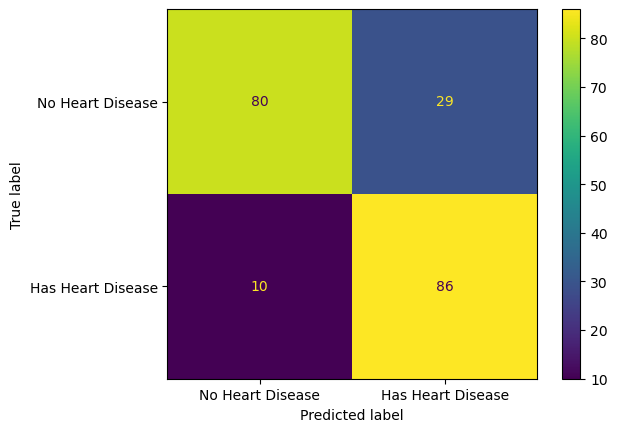

In [214]:
cm_display.plot()
plt.show()